# Fourier Transform

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from skimage import io
import cv2

In [5]:
sns.set()

## 三角関数

> 

### sinとcos

$y = sin(x)$

$2\pi$ごとに同じ形が現れる周期関数

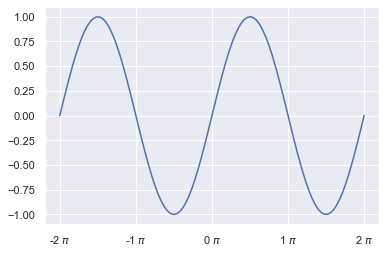

In [4]:
f, ax = plt.subplots(1)
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.sin(x)
ax.plot(x / np.pi, y)
ax.xaxis.set_major_formatter(FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1.0))
plt.show(f)

$y = cos(x)$

$2\pi$ごとに同じ形が現れる周期関数

$y = sin(x)$を左に$\frac{\pi}{2}$平行移動したもの

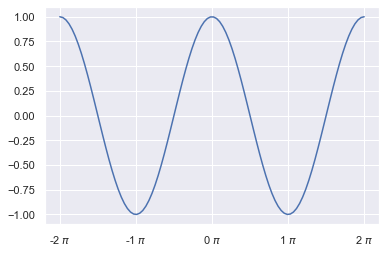

In [5]:
f, ax = plt.subplots(1)
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.cos(x)
ax.plot(x / np.pi, y)
ax.xaxis.set_major_formatter(FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1.0))
plt.show(f)

### 三角関数の周波数と振幅

- $x$に係数を乗ずることで周期が短くなる
- $x$の前の係数を周波数（frequency）と呼ぶ
- 周波数が大きくなると、より反復の多いグラフになる

In [6]:
def sinplot(amp=False):
    f, ax = plt.subplots(1)
    x = np.linspace(0, 2 * np.pi, 100)
    for i in range(1, 4):
        y = np.sin(i * x)
        if amp:
            y = i * np.sin(x)
        ax.plot(x / np.pi, y)
        ax.xaxis.set_major_formatter(FormatStrFormatter('%g $\pi$'))
        ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1.0))


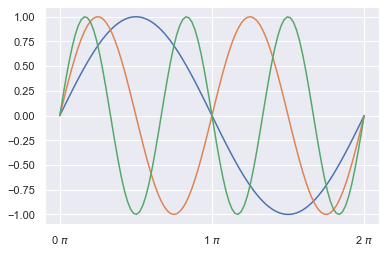

In [7]:
sinplot()

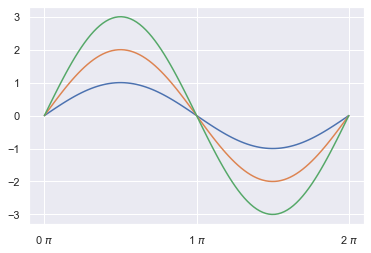

In [8]:
sinplot(amp=True)

In [9]:
def plot(func, start=0, period=1):
    f, ax = plt.subplots(1)
    x = np.linspace(start, start + period * 2 * np.pi, 100)
    y = func(x)
    ax.plot(x / np.pi, y)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g $\pi$'))
    ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1.0))
    plt.show(f)

### 三角関数の重ね合わせ

三角関数を重ね合わせることで様々なグラフを作ることができる

ex1: $y = 10sin(x) + 3sin(2x) + sin(5x)$



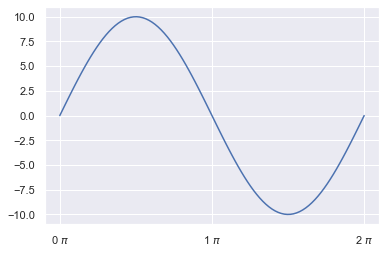

In [10]:
plot(lambda x: 10 * np.sin(x))

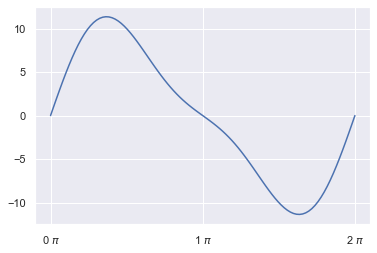

In [11]:
plot(lambda x: 10 * np.sin(x) + 3 * np.sin(2 * x))

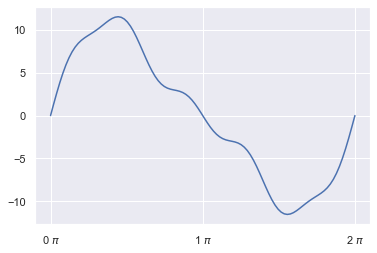

In [12]:
plot(lambda x: 10 * np.sin(x) + 3 * np.sin(2 * x) + np.sin(5 * x))

ex2: $y = \sum_{k = 1}^{\infty}{\frac{2}{k}(-1)^{k + 1}sin(kx)} = 2sin(x) - sin(2x) + \frac{2}{3}sin(3x) - \cdots$

In [13]:
def f1(x, m=10):
    res = 0
    for k in range(1, m + 1):
        res += (2 / k) * np.power(-1, k + 1) * np.sin(k * x)
    return res

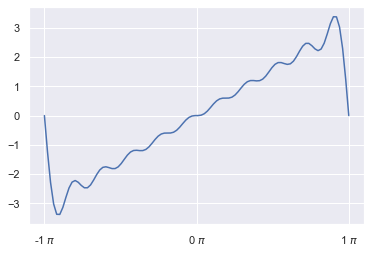

In [14]:
plot(lambda x: f1(x), start=-np.pi)

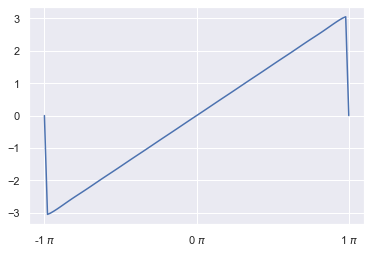

In [15]:
plot(lambda x: f1(x, m=1000), start=-np.pi)

## フーリエ級数展開

> ほとんどの関数は三角関数の和で表すことができる

——ジョゼフ・フーリエ

周期$2\pi$の周期関数について、以下のように近似できる

$f(x) = \frac{a_0}{2} + \sum_{k=1}^{\infty}(a_kcos(kx) + b_ksin(kx))$

$a_k = \frac{1}{\pi}\int_{-\pi}^{\pi}{f(x)cos(kx)dx}, k=0, 1, 2, \cdots$

$b_k = \frac{1}{\pi}\int_{-\pi}^{\pi}{f(x)sin(kx)dx}, k=1, 2, 3, \cdots$

$a_k, b_k$をフーリエ係数と呼ぶ

### 例：$f(x) = x^2$

$f(x) = \frac{\pi^2}{3} + \sum_{k=1}^{\infty}(-1)^k\frac{4}{k^2}cos(kx)$

In [16]:
def f2(x, m=10, p=False):
    res = np.power(np.pi, 2) / 3
    if p:
        print(f"cos(0x): {res}")
    for k in range(1, m + 1):
        if p:
            print(f"cos({k}x): {np.power(-1, k) * (4 / np.power(k, 2))}")
        res += np.power(-1, k) * (4 / np.power(k, 2)) * np.cos(k * x)
    return res

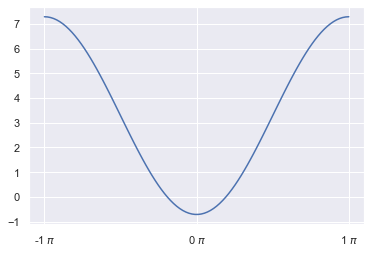

In [17]:
plot(lambda x: f2(x, m=1), start=-np.pi)

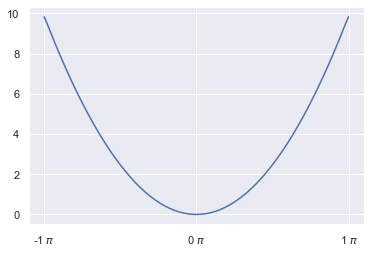

In [18]:
plot(lambda x: f2(x, m=100), start=-np.pi)

### フーリエ級数展開の制約

1. 周期関数のみ
2. 区分的に滑らか（有限個の点を除いて連続かつ微分可能）

$y=x$も$y=x^2$もフーリエ級数展開の制約を満たさない。その場合は、

1. 周期関数とみなして近似される（ある範囲を周期とみなす）
2. 滑らかでない点でギプスの現象が発生する

また、どんな関数も近似できるわけではない

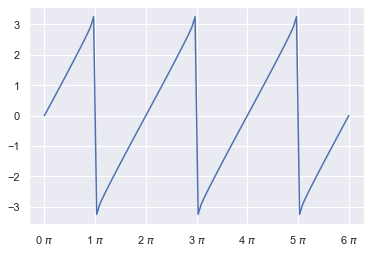

In [19]:
plot(lambda x: f1(x, m=100), start=0, period=3)

### フーリエ係数と周波数

フーリエ係数は、様々な周波数の三角関数を級数で表した時に各周波数がどれだけ含まれているかを表す

$f(x) = x^2$の場合、

$f(x) = \frac{\pi^2}{3} + \sum_{k=1}^{\infty}(-1)^k\frac{4}{k^2}cos(kx)$

|周波数|係数|
|---|---|
|$cos(0x)$|$\frac{\pi^2}{3}$|
|$cos(x)$|$-4$|
|$cos(2x)$|$1$|
|$cos(3x)$|$-\frac{4}{9}$|
|$\cdots$|$\cdots$|

cos(0x): 3.289868133696453
cos(1x): -4.0
cos(2x): 1.0
cos(3x): -0.4444444444444444
cos(4x): 0.25
cos(5x): -0.16
cos(6x): 0.1111111111111111
cos(7x): -0.08163265306122448
cos(8x): 0.0625
cos(9x): -0.04938271604938271
cos(10x): 0.04


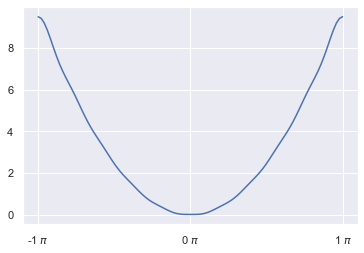

In [20]:
plot(lambda x: f2(x, m=10, p=True), start=-np.pi)

<BarContainer object of 11 artists>

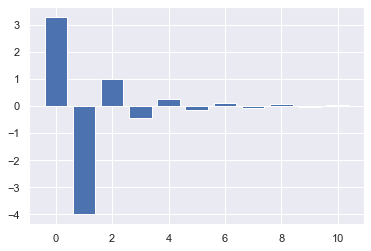

In [21]:
a = np.linspace(1, 10, 10)
b = np.power(-1, a) * (4 / np.power(a, 2))
x = [0]
y = [np.power(np.pi, 2) / 3]
x.extend(a)
y.extend(b)
plt.bar(x, y)

フーリエ係数を求めることで、関数がどのような周波数で構成されているかを調べることができる

## フーリエ変換

フーリエ係数を求める過程を拡張し、ある関数の周波数ごとの特性を表す**関数**に変換する過程を**フーリエ変換**という

||フーリエ変換||
|:---|:---|:---|
|$f(x)$|$F(\omega) = \int_{-\infty}{\infty}{f(t)e^{-i\omega t}}dt$|$F(\omega)$|
|数直線上のある点$x$においてどのような値を取るかを返す関数||ある周波数$\omega$に対してどのような値を取るかを返す関数|

### フーリエ変換の導出

フーリエ級数展開を用いてフーリエ変換を導出する

- フーリエ級数展開の複素数表現
- 任意の周期への拡張
- 無限周期への拡張
- フーリエ変換と逆フーリエ変換


#### フーリエ級数展開の複素数表現

オイラーの公式（$e^{j\theta} = cos\theta + jsin\theta$）を用いて、フーリエ級数展開を表現する

$f(x) = \sum_{k=0,\pm1}^{\pm\infty}c_ke^{jkx}$

$c_k = \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)e^{-jkx}dx$

#### 任意の周期への拡張

これまでのフーリエ級数展開は周期を$2\pi$と仮定していたが、周期を$T$へと拡張する

$f(x) = \sum_{k=0,\pm1}^{\pm\infty}c_ke^{jkx}$

$c_k = \frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(x)e^{-j\frac{2\pi}{T}kx}dx$

#### 無限周期への拡張

フーリエ級数展開の式にフーリエ係数の式を代入

$f(x) = \sum_{k=0,\pm1}^{\pm\infty}({\frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)e^{-j\frac{2\pi}{T}kx}dt})e^{jkx}$

$T \rightarrow \infty$とすることで無限周期へ拡張する

この時、総和（$\sigma$）は$\frac{2\pi}{T} \rightarrow \omega$を積分変数とする積分となる

$f(x) = \frac{1}{2\pi}\int_{-\infty}^{\infty}e^{j\omega x}(\int_{-\infty}^{\infty}f(t)e^{-j\omega t}dt)d\omega$


#### フーリエ変換と逆フーリエ変換

##### フーリエ変換
$F(\omega) = \int_{-\infty}^{\infty}f(t)e^{-j\omega t}dt$

数直線上の表現（空間領域）から周波数による表現（周波数領域）への変換

##### 逆フーリエ変換

$f(x) = \int_{-\infty}^{\infty}F(\omega)e^{j\omega t}d\omega$

周波数による表現（周波数領域）から元の数直線上の表現（空間領域）への変換



## 離散フーリエ変換

コンピュータで処理を行うためには離散的なデータ点を扱う必要がある

$N$点からなる離散的なデータ点$x_n (n = 0, 1, \cdots, N-1)$に対する離散フーリエ変換は以下のように定義される

$X_k = \sum_{n=0}^{N-1}x_ne^{-j\frac{2\pi kn}{N}}, (k=0, 1, 2, \cdots, N-1)$


- 離散データでは微分/積分が厳密に計算できないので総和を用いる
- 有限個のデータ点なので、無限の総和を計算できない（そのため、周期Nの周期性を仮定）
- $x_n$に含まれる周波数は$0$から$N-1$までを仮定する

In [1]:
def f3(x):
    return 3 * np.sin(x) + np.sin(7 * x) + np.cos(5 * x)

In [18]:
# TODO: fix the function

def dft(x):
    res = []
    s = 0
    N = len(x)
    for k in range(N):
        for i in range(N):
            s += x[i] * np.exp(-1j * ((2 * np.pi * k * i) / N))
        res.append(s)
    return res

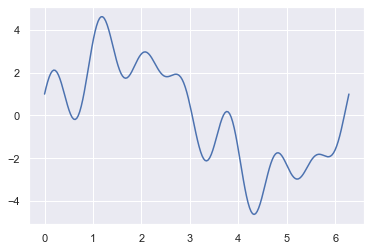

In [16]:
x = np.linspace(0, 2 * np.pi, 200)
y = f3(x)
plt.plot(x, y)

<BarContainer object of 15 artists>

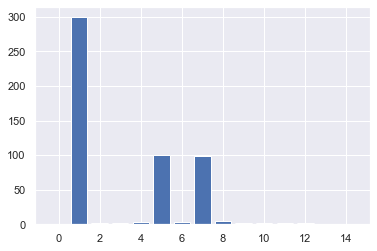

In [10]:
# 周波数0からn-1までの波がどれくらい含まれているか
plt.bar(np.arange(15), np.abs(np.fft.fft(y)[:15]))

<BarContainer object of 15 artists>

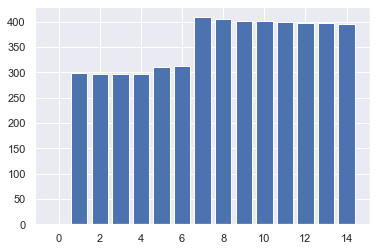

In [17]:
plt.bar(np.arange(15), np.abs(dft(y)[:15]))

## 二次元離散フーリエ変換

二次元離散フーリエ変換の定義

$X_{u, v} = \sum_{h=0}^{H-1}\sum_{w=0}{W-1}x_{h, w}e^{-2\pi j(\frac{uh}{H} + \frac{vx}{W})}$

- 入力は二次元のデータ点
- 二次元の様々な周波数の三角関数が入力にどれくらい含まれているかを表す

二次元の周波数の三角関数とは、$z = sin(ax) * sin(by)$のような三角関数のこと

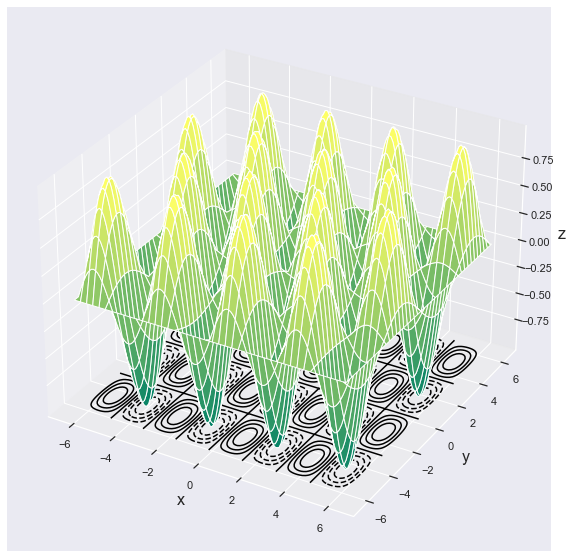

In [26]:
from mpl_toolkits.mplot3d import Axes3D

# Figureと3DAxeS
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection="3d")

# 軸ラベルを設定
ax.set_xlabel("x", size = 16)
ax.set_ylabel("y", size = 16)
ax.set_zlabel("z", size = 16)

pi = np.pi

# (x,y)データを作成
x = np.linspace(-2 * pi, 2 * pi, 128)
y = np.linspace(-2 * pi, 2 * pi, 128)

# 格子点を作成
X, Y = np.meshgrid(x, y)

# 高度の計算式
Z = np.sin(2 * X) * np.sin(Y)

# 曲面を描画
ax.plot_surface(X, Y, Z, cmap = "summer")

# 底面に等高線を描画
ax.contour(X, Y, Z, colors = "black", offset = -1)

plt.show()

$X_{u, v}$は、**縦方向に$u/2$本のピークがあり、横方向に$v/2$本のピークがある**三角関数が元画像にどれくらい含まれているかを表している

## 画像のフーリエ変換

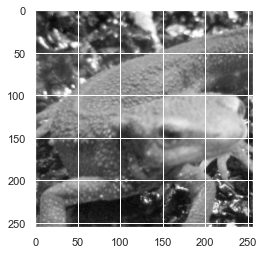

In [11]:
img_base_url = "https://yoyoyo-yo.github.io/Gasyori100knock/"
img_orig = io.imread(img_base_url + "dataset/images/imori_256x256.png")
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray")

In [12]:
ft = np.fft.fft(img_gray)

In [13]:
ft.shape

(256, 256)

In [14]:
ft

array([[ 3.35290000e+04   +0.j        , -3.13935313e+03+1666.52672437j,
         2.40793280e+03+1311.63780435j, ...,
        -4.16787201e+03+1546.79457322j,  2.40793280e+03-1311.63780435j,
        -3.13935313e+03-1666.52672437j],
       [ 3.43230000e+04   +0.j        , -2.57116269e+03+1458.90094897j,
         2.21872856e+03+1884.5043209j , ...,
        -4.84579975e+03+2263.4519122j ,  2.21872856e+03-1884.5043209j ,
        -2.57116269e+03-1458.90094897j],
       [ 3.43840000e+04   +0.j        , -2.05450910e+03+1444.50652717j,
         2.21017879e+03+2201.20757367j, ...,
        -5.27847929e+03+2232.48477258j,  2.21017879e+03-2201.20757367j,
        -2.05450910e+03-1444.50652717j],
       ...,
       [ 2.58960000e+04   +0.j        ,  4.57625795e+03+3241.61802209j,
        -1.13837482e+03 +333.22528922j, ...,
         6.24284673e+01+3031.20254322j, -1.13837482e+03 -333.22528922j,
         4.57625795e+03-3241.61802209j],
       [ 2.64930000e+04   +0.j        ,  4.99063735e+03+3520.7356900

### 画像のフーリエ変換と再構成

フーリエ変換の値を対応する波形にかけて足し合わせる

In [31]:
# https://gist.github.com/ginrou/5e443b42aabe73664b41

import numpy as np
import scipy.misc
from scipy.fftpack import dct, idct
import sys

H, W = img_gray.shape

imori = img_gray.astype(float)
imori_F = dct(dct(imori, axis=0), axis=1) ## 2D DCT of imori

canvas = np.zeros((H,W))
for h in range(H):
    for w in range(W):
        a = np.zeros((H,W))
        a[h,w] = 1
        base = idct(idct(a, axis=0), axis=1) ## create dct bases
        canvas += imori_F[h,w] * base ## accumulate
        io.imsave("~/Downloads/imori/base-%03d-%03d.png" % (h, w), base)
        io.imsave("~/Downloads/imori/imori-%03d-%03d.png" % (h, w), canvas)

<ipython-input-31-9fe57d0bf827>:20: UserWarning: ~/Downloads/imori/base-000-000.png is a low contrast image
  io.imsave("~/Downloads/imori/base-%03d-%03d.png" % (h, w), base)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-31-9fe57d0bf827>:21: UserWarning: ~/Downloads/imori/imori-000-000.png is a low contrast image
  io.imsave("~/Downloads/imori/imori-%03d-%03d.png" % (h, w), canvas)
Lossy conversion from float64 to uint8. Range [-1.9999623505652022, 1.9999623505652022]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [30465196.509169355, 37176395.490830645]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-1.9998494036782888, 1.9998494036782888]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [29859171.311621927,

## 参考資料
- [https://www.slideshare.net/ginrou799/ss-46355460](https://www.slideshare.net/ginrou799/ss-46355460)
- [https://www.youtube.com/watch?v=xs79UkAEGxc](https://www.youtube.com/watch?v=xs79UkAEGxc)
- [https://www.youtube.com/watch?v=spUNpyF58BY](https://www.youtube.com/watch?v=spUNpyF58BY)